In [206]:
# Third party libraries
# Observe that, in addition to bringing the libraries into our current namespace, 
#  we also give them a shorter alias. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import datetime

In [207]:
df_ped = pd.read_csv('count2021-2022.csv', parse_dates={'Date': ['Year', 'Month', 'Mdate']})
df_ped["Date_Time"] = pd.to_datetime(df_ped["Date_Time"])
df_ped['Year'] = df_ped['Date'].dt.year

df_rain = pd.read_csv('IDCJAC0009_086338_1800_Data.csv')
df_solar = pd.read_csv('IDCJAC0016_086338_1800_Data.csv')
df_tem = pd.read_csv('IDCJAC0010_086338_1800_Data.csv')

In [208]:
def convert_to_datetime(df):
    df["Date"] = df["Year"].astype(str) +"/" + df["Month"].astype(str)+ "/"+ df["Day"].astype(str)
    df["Date"] = pd.to_datetime(df["Date"])
    df=df[(df['Date']>='2021-01-01')& (df['Date'] <= '2022-05-31')]
    return df

In [209]:
df_rain=convert_to_datetime(df_rain)
df_solar = convert_to_datetime(df_solar)
df_tem = convert_to_datetime(df_tem)

1. Divide each weekday into three periods consisting of a morning rush hour (8:00-9:00), lunch hour
(13:00-14:00), and evening rush hour (17:00-18:00). Each sensor can be associated with a count for each of
these periods. Summing over all sensors we have a period's overall pedestrian count on a particular week day.
Compute the following statistics for each of the three periods in 2022.

    • Mean, median, min, max of the period's overall pedestrian count on weekdays

In [210]:
df_ped['Date_Time'] = pd.to_datetime(df_ped['Date_Time'])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']


In [211]:
# extract data based on the three periods
morning_rush_hour = df_ped.loc[(df_ped['Time'] >= 8)& (df_ped['Time']<9) & (df_ped['Year'] == 2022) & (df_ped['Day'].isin(weekday))]
lunch_hour = df_ped.loc[(df_ped['Time'] >=13) & (df_ped['Time']<14) & (df_ped['Year'] == 2022) & (df_ped['Day'].isin(weekday))]
evening_rush_hour = df_ped.loc[(df_ped['Time'] >=17) & (df_ped['Time']<18) & (df_ped['Year'] == 2022) & (df_ped['Day'].isin(weekday))]
# group by sensor id, then aggregation of the weekday and descriptive stats for each sensor


In [212]:
summary_morning = morning_rush_hour['Hourly_Counts'].describe()
summary_lunch = lunch_hour['Hourly_Counts'].describe()
summary_evening = evening_rush_hour['Hourly_Counts'].describe() 
summary_morning
summary_lunch
summary_evening

count    7162.000000
mean      662.854231
std       669.843266
min         0.000000
25%       186.000000
50%       400.000000
75%       898.750000
max      5037.000000
Name: Hourly_Counts, dtype: float64

### 2. Let the daily overall pedestrian count be the total number of pedestrians counted by sensors on a particular day. For each of 2021, 2022, generate a scatter plot of maximum temperature (x axis) and daily overall pedestrian count (y axis)

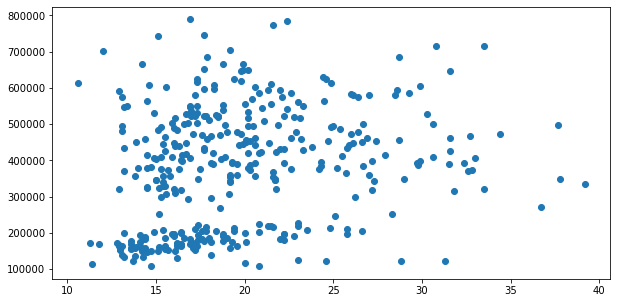

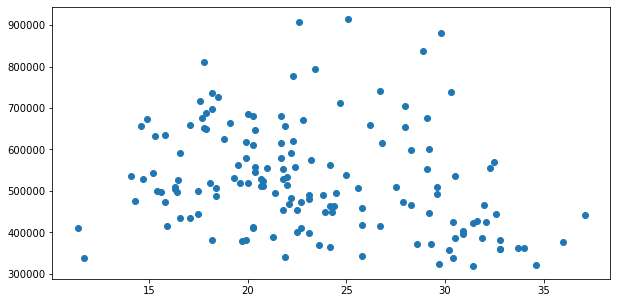

In [213]:
df_ped_total = df_ped.groupby([df_ped['Date_Time'].dt.date]).sum()['Hourly_Counts']
df_tem_max = df_tem[['Date', 'Maximum temperature (Degree C)']]
df_tem_max.set_index('Date', inplace=True)
df_q2= pd.concat([df_tem_max, df_ped_total], axis=1)
q2_2021= df_q2['2021-01-01':'2021-12-31']
q2_2022  = df_q2['2022-01-01':]
y_q2_21 = q2_2021['Hourly_Counts']
x_q2_21 = q2_2021['Maximum temperature (Degree C)']
y_q2_22 = q2_2022['Hourly_Counts']
x_q2_22 = q2_2022['Maximum temperature (Degree C)']
plt.figure(figsize=(10,5))
plt.scatter(x_q2_21, y_q2_21)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x_q2_22, y_q2_22)
plt.show()

#### 3. For each of 2021, 2022, generate a scatter plot of rainfall (x axis) and daily overall pedestrian count (y axis)

In [12]:
df_rain_amount = df_rain[['Date', 'Rainfall amount (millimetres)']]
df_rain_amount.set_index('Date', inplace=True)

In [13]:
df_q3= pd.concat([df_rain_amount, df_ped_total], axis=1)
q3_2021= df_q3['2021-01-01':'2021-12-31']
q3_2022  = df_q3['2022-01-01':]
y_q3_21 = q3_2021['Hourly_Counts']
x_q3_21 = q3_2021['Rainfall amount (millimetres)']
y_q3_22 = q3_2022['Hourly_Counts']
x_q3_22 = q3_2022['Rainfall amount (millimetres)']

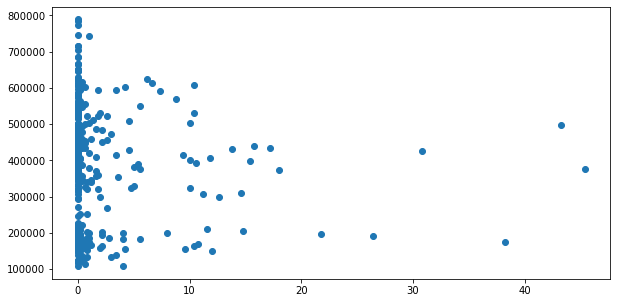

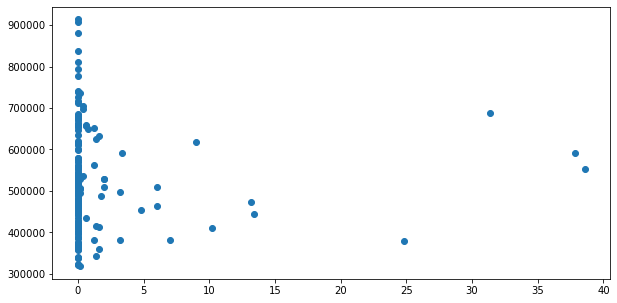

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(x_q3_21, y_q3_21)
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(x_q3_22, y_q3_22)
plt.show()

### 4. For each of 2021, 2022, generate a scatter plot of solar exposure (x axis) and daily overall pedestrian count (y axis)

In [15]:
df_solar_exposure = df_solar[['Date', 'Daily global solar exposure (MJ/m*m)']]
df_solar_exposure.set_index('Date', inplace=True)

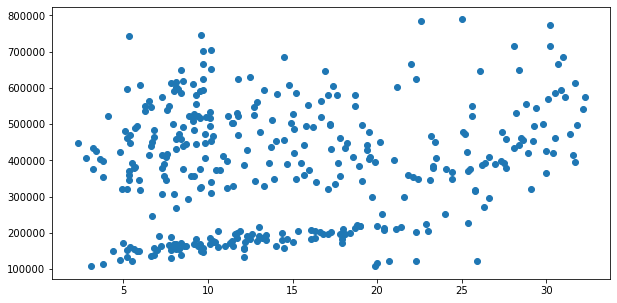

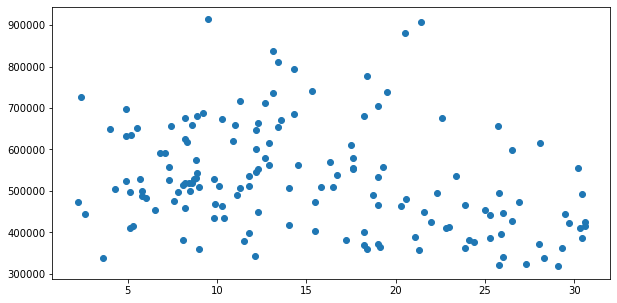

In [16]:
df_q4= pd.concat([df_solar_exposure, df_ped_total], axis=1)
q4_2021= df_q4['2021-01-01':'2021-12-31']
q4_2022  = df_q4['2022-01-01':]
y_q4_21 = q4_2021['Hourly_Counts']
x_q4_21 = q4_2021['Daily global solar exposure (MJ/m*m)']
y_q4_22 = q4_2022['Hourly_Counts']
x_q4_22 = q4_2022['Daily global solar exposure (MJ/m*m)']

plt.figure(figsize=(10,5))
plt.scatter(x_q4_21, y_q4_21)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x_q4_22, y_q4_22)
plt.show()

### 5. For each of 2021, 2022, generate a histogram showing how busy (mean daily overall pedestrian count y axis) each day of the week (x axis) is.

In [122]:
ped_2021 = df_ped[(df_ped['Year']== 2021)].groupby(['Date', 'Day']).sum().groupby('Day').mean()['Hourly_Counts']
ped_2022 = df_ped[(df_ped['Year']== 2022)].groupby(['Date', 'Day']).sum().groupby('Day').mean()['Hourly_Counts']
ped_2021 = ped_2021.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ped_2022 = ped_2022.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# histogram of the number of pedestrians each day of the week
plt.figure(figsize=(10,5))
plt.bar(ped_2021.index, ped_2021)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(ped_2022.index, ped_2022)
plt.show()

### 6. For 2022, generate a histogram showing the mean daily overall pedestrian count (y axis) for sensors 1-20 (x axis).

In [140]:
ped_2022_20 = df_ped.loc[(df_ped['Year'] == 2022) & (df_ped['Sensor_ID']<=20)].groupby(['Sensor_ID']).mean()['Hourly_Counts']
plt.figure(figsize=(10,5))
plt.bar(ped_2022_20.index, ped_2022_20)
plt.show()

### 7. Same as Q5, but in the calculation only include days where it rained.

In [161]:
ped_rain_merge = pd.merge(df_ped, df_rain, on='Date')
ped_2021_q7 = ped_rain_merge[(ped_rain_merge['Year_x']== 2021) & (ped_rain_merge['Rainfall amount (millimetres)']!=0)].groupby(['Date', 'Day_x']).sum().groupby('Day_x').mean()['Hourly_Counts']
ped_2022_q7 = ped_rain_merge[(ped_rain_merge['Year_x']== 2022) & (ped_rain_merge['Rainfall amount (millimetres)']!=0)].groupby(['Date', 'Day_x']).sum().groupby('Day_x').mean()['Hourly_Counts']
ped_2021_q7 = ped_2021_q7.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ped_2022_q7 = ped_2022_q7.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# histogram of the number of pedestrians each day of the week
plt.figure(figsize=(10,5))
plt.bar(ped_2021_q7.index, ped_2021_q7)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(ped_2022_q7.index, ped_2022_q7)
plt.show()

### 8. Same as Q5, but in the calculation only include days where the maximum temperature was less than 20 and it rained.

In [181]:
ped_rain_tem_merge = pd.merge(ped_rain_merge, df_tem, on='Date')
ped_2021_q8 = ped_rain_tem_merge[(ped_rain_tem_merge['Year_x']== 2021) & (ped_rain_tem_merge['Rainfall amount (millimetres)']!=0)& (ped_rain_tem_merge['Maximum temperature (Degree C)']<20)].groupby(['Date', 'Day_x']).sum().groupby('Day_x').mean()['Hourly_Counts']
ped_2022_q8 = ped_rain_tem_merge[(ped_rain_tem_merge['Year_x']== 2022) & (ped_rain_tem_merge['Rainfall amount (millimetres)']!=0)& (ped_rain_tem_merge['Maximum temperature (Degree C)']<20)].groupby(['Date', 'Day_x']).sum().groupby('Day_x').mean()['Hourly_Counts']
ped_2021_q8 = ped_2021_q8.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ped_2022_q8 = ped_2022_q8.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

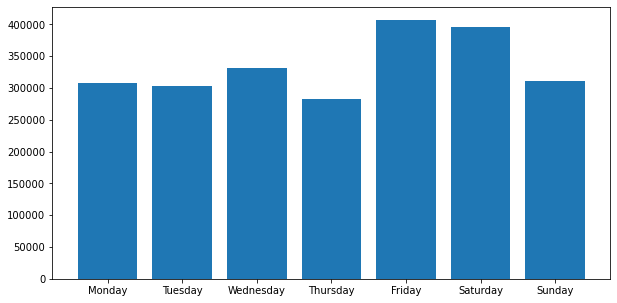

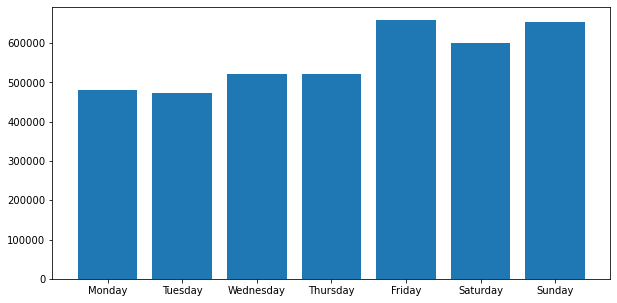

In [182]:
# histogram of the number of pedestrians each day of the week
plt.figure(figsize=(10,5))
plt.bar(ped_2021_q8.index, ped_2021_q8)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(ped_2022_q8.index, ped_2022_q8)
plt.show()

### 9. Consider the time series of the daily overall pedestrian count for each sensor in May 2021 and in May 2022. Comparing these two months, which sensor's time series changed the most and by how much? [you should use Euclidean distance to compare two time series]

In [202]:
daily_pedcount_2021 = df_ped[(df_ped['Date']>='2021-05-01')& (df_ped['Date']<='2021-05-31')].groupby(['Sensor_ID','Date']).sum()['Hourly_Counts']
daily_pedcount_2022 = df_ped[(df_ped['Date']>='2022-05-01')& (df_ped['Date']<='2022-05-31')].groupby(['Sensor_ID','Date']).sum()['Hourly_Counts']

In [204]:
daily_pedcount_2022

Sensor_ID  Date      
1          2022-05-01    20289
           2022-05-02    16227
           2022-05-03    16411
           2022-05-04    15553
           2022-05-05    18460
                         ...  
86         2022-05-27     1652
           2022-05-28     1611
           2022-05-29     1398
           2022-05-30     1007
           2022-05-31     1210
Name: Hourly_Counts, Length: 2005, dtype: int64

In [195]:
df_ped

,Date,ID,Date_Time,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,Year
0,2021-01-01,3482939,2021-01-01 00:00:00,Friday,0,4,Town Hall (West),1461,2021
1,2021-01-01,3482940,2021-01-01 00:00:00,Friday,0,17,Collins Place (South),79,2021
2,2021-01-01,3482941,2021-01-01 00:00:00,Friday,0,18,Collins Place (North),33,2021
3,2021-01-01,3482942,2021-01-01 00:00:00,Friday,0,53,Collins St (North),196,2021
4,2021-01-01,3482943,2021-01-01 00:00:00,Friday,0,2,Bourke Street Mall (South),236,2021
...,...,...,...,...,...,...,...,...,...
837590,2022-05-31,4326000,2022-05-31 19:00:00,Tuesday,19,86,Queensberry St - Errol St (South),72,2022
837591,2022-05-31,4326001,2022-05-31 20:00:00,Tuesday,20,86,Queensberry St - Errol St (South),52,2022
837592,2022-05-31,4326002,2022-05-31 21:00:00,Tuesday,21,86,Queensberry St - Errol St (South),27,2022
837593,2022-05-31,4326003,2022-05-31 22:00:00,Tuesday,22,86,Queensberry St - Errol St (South),40,2022
